In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('dataset_part_1.csv')
df.head()

,Unnamed: 0,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,4,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,5,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,6,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,7,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,8,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857


In [3]:
df.isnull().sum()/len(df)*100

Unnamed: 0         0.000000
FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass        0.000000
Orbit              0.000000
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        28.888889
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
dtype: float64

In [4]:
df.dtypes

Unnamed: 0          int64
FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

In [5]:
df['LaunchSite'].value_counts()

LaunchSite
CCSFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64

In [6]:
df['Orbit'].value_counts()

Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64

In [7]:
landing_outcome = df['Outcome'].value_counts()
print(landing_outcome)

Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64


#### True Ocean means the mission outcome was successfully landed to a specific region of the ocean while False Ocean means the mission outcome was unsuccessfully landed to a specific region of the ocean. True RTLS means the mission outcome was successfully landed to a ground pad False RTLS means the mission outcome was unsuccessfully landed to a ground pad.True ASDS means the mission outcome was successfully landed to a drone ship False ASDS means the mission outcome was unsuccessfully landed to a drone ship. None ASDS and None None these represent a failure to land.

In [8]:
for i,outcome in enumerate(landing_outcome.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [9]:
failure_landing = set(landing_outcome.keys()[[1,3,5,6,7]])
failure_landing

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [10]:
landing_class = []
for i in range(len(df)):
    if df['Outcome'].iloc[i] in failure_landing:
        landing_class.append(0)
    else:
        landing_class.append(1)

print(landing_class)


[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [11]:
df.columns

Index(['Unnamed: 0', 'FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass',
       'Orbit', 'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused',
       'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude',
       'Latitude'],
      dtype='object')

In [15]:
df['class'] = landing_class
df[['class']]

,class
0,0
1,0
2,0
3,0
4,0
...,...
85,1
86,1
87,1
88,1


In [16]:
df['class'].mean()

0.6666666666666666

In [17]:
df.to_csv('dataset_part2.csv')

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

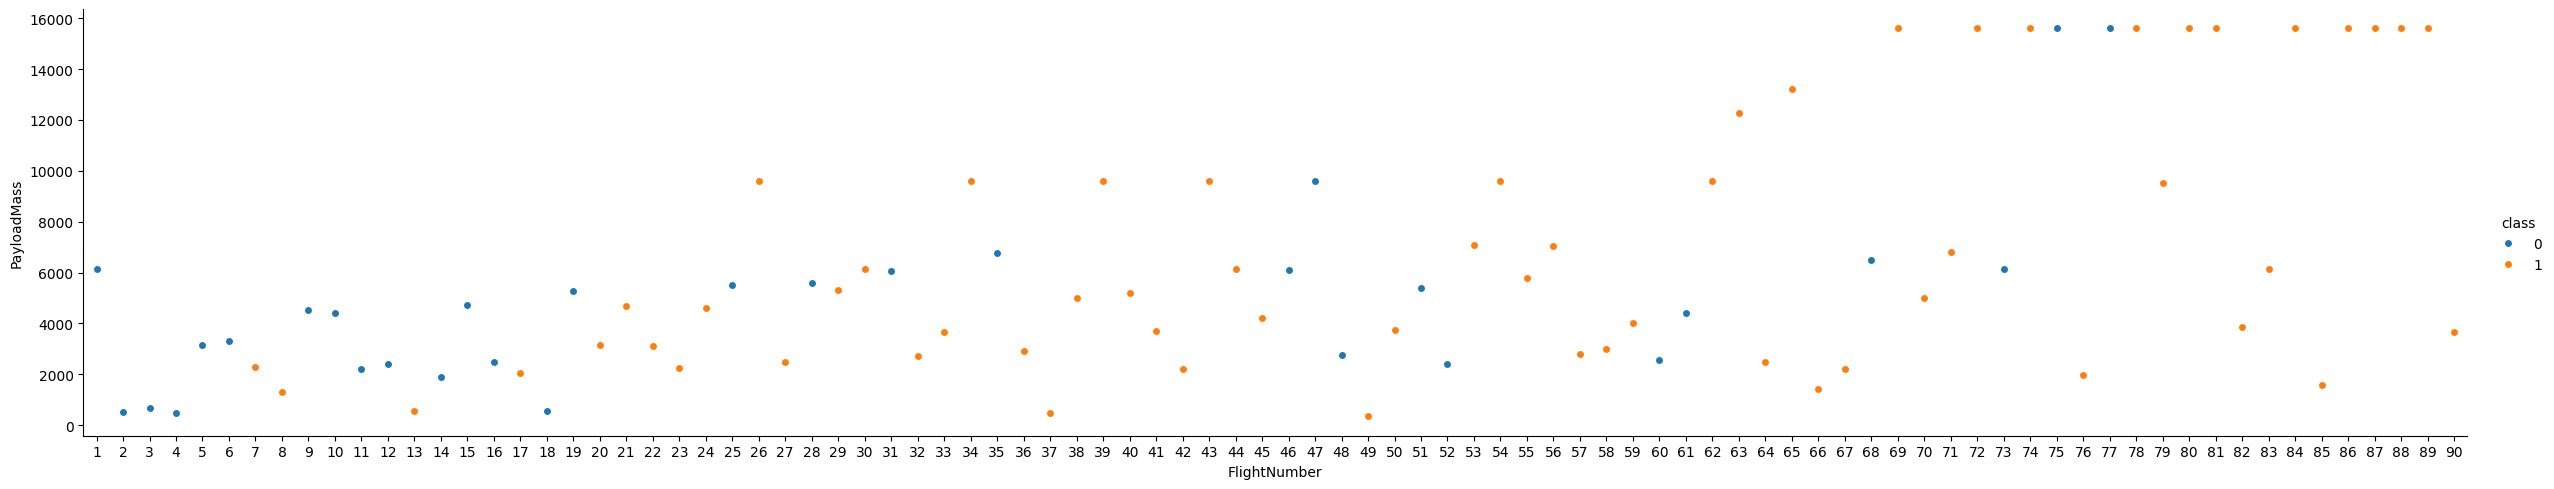

In [20]:
sns.catplot(y='PayloadMass', x='FlightNumber', hue='class', data=df, aspect= 5)
plt.show()

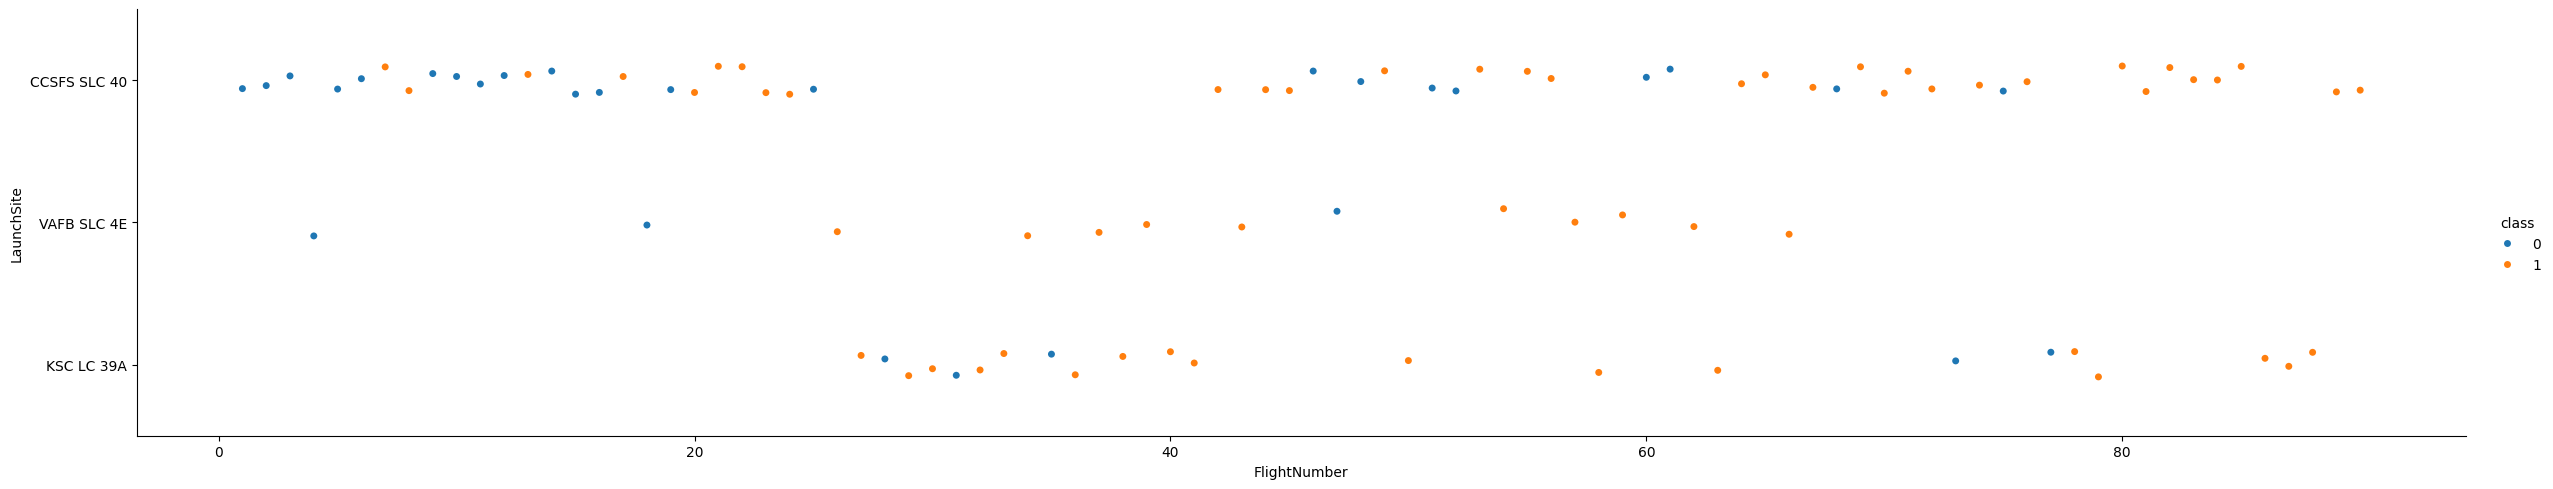

In [22]:
sns.catplot(y='LaunchSite', x='FlightNumber', hue='class', data=df, aspect= 5)
plt.show()

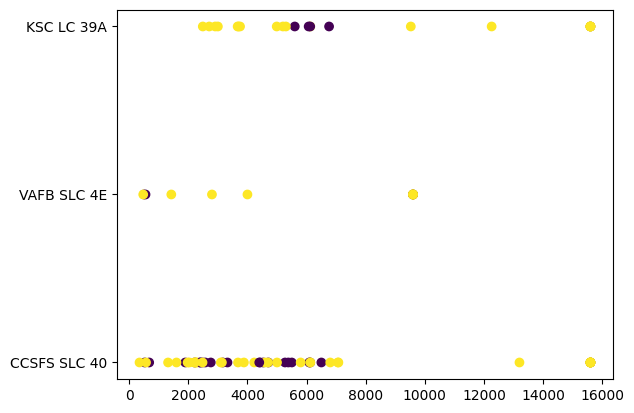

In [29]:
plt.scatter(x='PayloadMass', y='LaunchSite', data=df, c='class')
plt.show()

Orbit
ES-L1    1.000000
GEO      1.000000
GTO      0.518519
HEO      1.000000
ISS      0.619048
LEO      0.714286
MEO      0.666667
PO       0.666667
SO       0.000000
SSO      1.000000
VLEO     0.857143
Name: class, dtype: float64
    Orbit     class
0   ES-L1  1.000000
1     GEO  1.000000
2     GTO  0.518519
3     HEO  1.000000
4     ISS  0.619048
5     LEO  0.714286
6     MEO  0.666667
7      PO  0.666667
8      SO  0.000000
9     SSO  1.000000
10   VLEO  0.857143


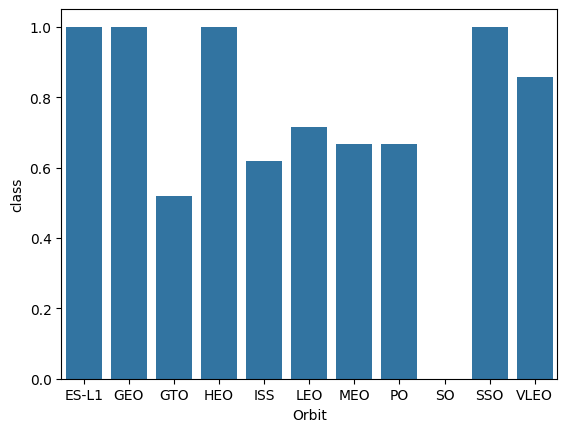

In [37]:
group = df.groupby('Orbit')['class'].mean()
print(group)

group_df = group.reset_index()
print(group_df)

sns.barplot(x='Orbit', y='class',data=group_df)
plt.show()

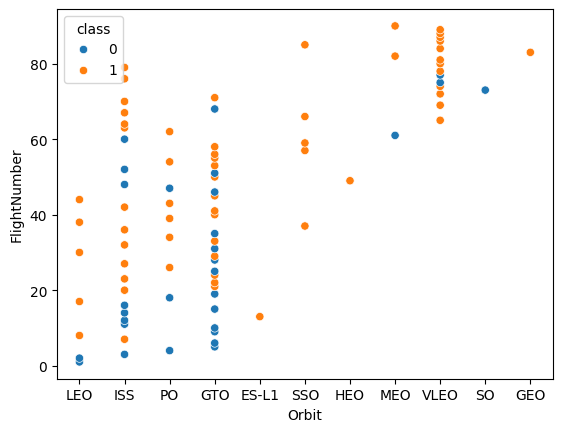

In [39]:
sns.scatterplot(x='Orbit', y='FlightNumber', data=df, hue='class')
plt.show()

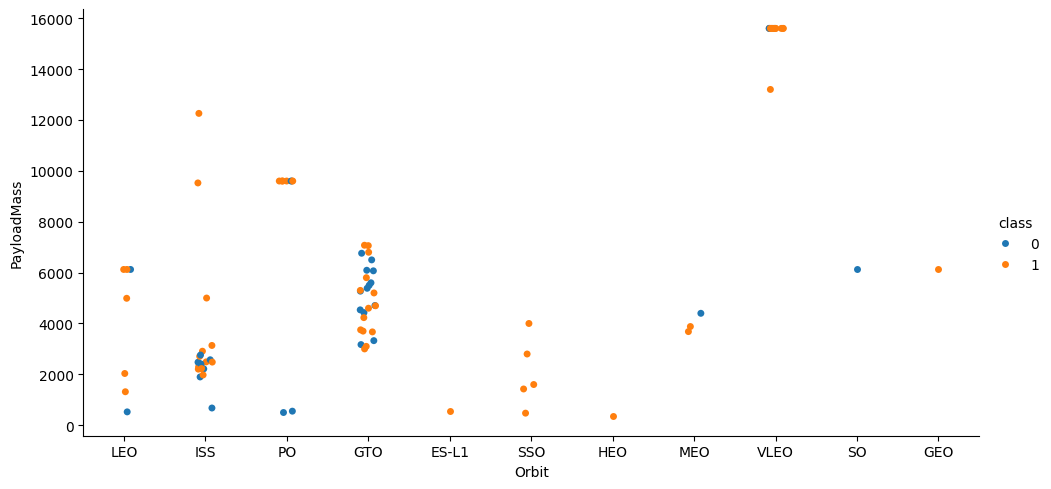

In [41]:
sns.catplot(y='PayloadMass', x='Orbit', hue='class', data=df, aspect= 2)
plt.show()

In [48]:
df['Date']=pd.to_datetime(df['Date'])
year = df['Date'].dt.year
print(year)

df['year_launched'] = year
df.columns

0     2010
1     2012
2     2013
3     2013
4     2013
      ... 
85    2020
86    2020
87    2020
88    2020
89    2020
Name: Date, Length: 90, dtype: int32


Index(['Unnamed: 0', 'FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass',
       'Orbit', 'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused',
       'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude',
       'Latitude', 'class', 'year_launched'],
      dtype='object')

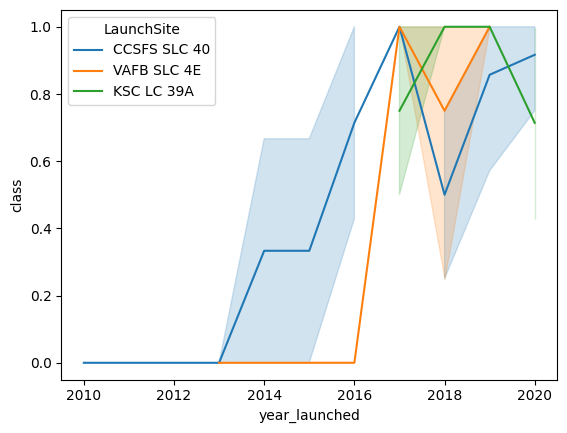

In [54]:
sns.lineplot(x='year_launched', y='class', data=df, hue='LaunchSite')
plt.show()

In [55]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [56]:
features.dtypes

FlightNumber      int64
PayloadMass     float64
Orbit            object
LaunchSite       object
Flights           int64
GridFins           bool
Reused             bool
Legs               bool
LandingPad       object
Block           float64
ReusedCount       int64
Serial           object
dtype: object

In [65]:
col = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']
feature_one_hot = pd.get_dummies(features, columns=col)
feature_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [66]:
feature_one_hot.columns

Index(['FlightNumber', 'PayloadMass', 'Flights', 'GridFins', 'Reused', 'Legs',
       'Block', 'ReusedCount', 'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO',
       'Orbit_HEO', 'Orbit_ISS', 'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO',
       'Orbit_SO', 'Orbit_SSO', 'Orbit_VLEO', 'LaunchSite_CCSFS SLC 40',
       'LaunchSite_KSC LC 39A', 'LaunchSite_VAFB SLC 4E',
       'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial

In [70]:
feature_one_hot = feature_one_hot.apply(pd.to_numeric).astype(float)

In [71]:
feature_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object